<table><tbody><tr><th><p><img alt="Emblema" src="https://cdn6.aptoide.com/imgs/6/f/4/6f4821daa840da8fe971445350759fe5_icon.png" style="width:150px;"></p></th><th><p><strong>Inteligencia Artificial</strong></p><p><strong>Grado en Ingeniería Informática en Sistemas de Información – Curso 2024/2025</strong></p><p><strong>ENSEÑANZAS PRÁCTICAS Y DE DESARROLLO</strong></p><h1>EPD 8: Búsqueda Informada</h1></th></tr></tbody></table>

____

## Objetivos
- Resolver problemas de búsquedas informadas con la librería AIMA.
- Algoritmos de búsqueda informada en la herramienta Search de AISPACE.


In [ ]:
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.optimize as opt
import time
from search import *

## Experimentos

#### EX01. 
Herramienta “Search”. Seleccione en la opción del menú “File” la entrada “Load Sample Problem” y elija la opción “Delivery Robot (acyclic)”. Se puede observar en los nodos que el valor de la heurística corresponde a la siguiente tabla:

|              |                |              |
|--------------|----------------|--------------|
| h(mail) = 26 | h(ts) = 23     | h(o103) = 21 || h(o109) = 24 | h(o111) = 27   | h(o119) = 11 || h(o123) = 4  | h(o125) = 6    | h(r123) = 0  || h(b1) = 13   | h(b2) = 15     | h(b3) = 17   || h(b4) = 18   | h(c1) = 6      | h(c2) = 10   || h(c3) = 12   | h(storage) = 12|              |

1. ¿Es la función h admisible? Explica por qué o por qué no.2. Finalmente muestra y razona la traza del algoritmo A*.

##### Solución:

#### EX02.
Utiliza la heurística h de la clase EightPuzzle, de librería AIMA, que indica el número de fichas mal colocadas, para realizar recorridos de búsquedas informadas, como el A*. Compare el tiempo transcurrido en varias ejecuciones con respecto a la búsqueda en anchura.


#### EX03.
Dada la solución al problema de los tres misioneros y tres caníbales realizada en la práctica anterior, incluya una heurística para poder aplicar las búsquedas informadas.


In [ ]:
class Misioneros(Problem):
    """ Tres misioneros y tres caníbales hacen un viaje juntos, pero el camino está cortado por un rio.
    En la orilla encuentran una lancha que los ayuda a pasar, pero sólo puede llevar dos a la vez y
    existe el peligro de que, en cualquier orilla, si los caníbales son más numerosos que los misioneros,
    estos últimos pueden servir de alimento.  """

    def getMisioneros(self, state):
        """Devuelve el número de misioneros a la izquierda del rio"""

        return state[0]

    def getCanibales(self, state):
        """Devuelve el número de canívales a la izquierda del rio"""

        return state[1]

    def getBarca(self, state):
        """Devuelve la orilla del rio en la que se encuentra la barca, 0-derecha o 1-izquierda"""

        return state[2]

    def estadoPeligroso(self, m, c):
        return ((m < c and m != 0) or (m > c and m != 3))


    def canMoveBoat(self, state, where):
        retVal = True

        if (where == 'M1C1'):
            if (self.getBarca(state) == 1):
                retVal = ((self.getMisioneros(state) >= 1) and (self.getCanibales(state) >= 1) and
                          (not self.estadoPeligroso(self.getMisioneros(state)-1, self.getCanibales(state)-1)))
            else:
                retVal = ((3-self.getMisioneros(state) >= 1) and (3-self.getCanibales(state) >= 1) and
                          (not self.estadoPeligroso(self.getMisioneros(state)+1, self.getCanibales(state)+1)))
        elif (where == 'M1C0'):
            if (self.getBarca(state) == 1):
                retVal = ((self.getMisioneros(state) >= 1) and
                          (not self.estadoPeligroso(self.getMisioneros(state)-1, self.getCanibales(state))))
            else:
                retVal = ((3-self.getMisioneros(state) >= 1) and
                          (not self.estadoPeligroso(self.getMisioneros(state)+1, self.getCanibales(state))))
        elif (where == 'M0C1'):
            if (self.getBarca(state) == 1):
                retVal = ((self.getCanibales(state) >= 1) and
                          (not self.estadoPeligroso(self.getMisioneros(state), self.getCanibales(state)-1)))
            else:
                retVal = ((3-self.getCanibales(state) >= 1) and
                          (not self.estadoPeligroso(self.getMisioneros(state), self.getCanibales(state)+1)))
        elif (where == 'M2C0'):
            if (self.getBarca(state) == 1):
                retVal = ((self.getMisioneros(state) >= 2) and
                          (not self.estadoPeligroso(self.getMisioneros(state)-2, self.getCanibales(state))))
            else:
                retVal = ((3-self.getMisioneros(state) >= 2) and
                          (not self.estadoPeligroso(self.getMisioneros(state)+2, self.getCanibales(state))))
        elif (where == 'M0C2'):
            if (self.getBarca(state) == 1):
                retVal = ((self.getCanibales(state) >= 2) and
                          (not self.estadoPeligroso(self.getMisioneros(state), self.getCanibales(state)-2)))
            else:
                retVal = ((3-self.getCanibales(state) >= 2) and
                          (not self.estadoPeligroso(self.getMisioneros(state), self.getCanibales(state)+2)))

        return retVal;

    def moveBoatM1C1(self,state):
        if (self.getBarca(state) == 1):
            state[2] = 0
            state[0] -= 1
            state[1] -= 1
        else:
            state[2] = 1
            state[0] += 1
            state[1] += 1

    def moveBoatM1C0(self,state):
        if (self.getBarca(state) == 1):
            state[2] = 0
            state[0] -= 1
        else:
            state[2] = 1
            state[0] += 1

    def moveBoatM0C1(self,state):
        if (self.getBarca(state) == 1):
            state[2] = 0
            state[1] -= 1
        else:
            state[2] = 1
            state[1] += 1

    def moveBoatM2C0(self,state):
        if (self.getBarca(state) == 1):
            state[2] = 0
            state[0] -= 2
        else:
            state[2] = 1
            state[0] += 2

    def moveBoatM0C2(self,state):
        if (self.getBarca(state) == 1):
            state[2] = 0
            state[1] -= 2
        else:
            state[2] = 1
            state[1] += 2


    def __init__(self, initial=(3, 3, 1), goal=(0, 0, 0)):
        """ Define goal state and initialize a problem """
        super().__init__(initial, goal)

    def actions(self, state):
        """ Return the actions that can be executed in the given state.
        The result would be a list, since there are only four possible actions
        in any given state of the environment """

        possible_actions = []

        if self.canMoveBoat(state,'M1C1'):
            possible_actions.append('M1C1')
        if self.canMoveBoat(state,'M1C0'):
            possible_actions.append('M1C0')
        if self.canMoveBoat(state,'M0C1'):
            possible_actions.append('M0C1')
        if self.canMoveBoat(state,'M2C0'):
            possible_actions.append('M2C0')
        if self.canMoveBoat(state,'M0C2'):
            possible_actions.append('M0C2')

        return possible_actions

    def result(self, state, action):
        """ Given state and action, return a new state that is the result of the action.
        Action is assumed to be a valid action in the state """

        new_state = list(state)

        if (action == 'M1C1'):
            self.moveBoatM1C1(new_state)
        elif (action == 'M1C0'):
            self.moveBoatM1C0(new_state)
        elif (action == 'M0C1'):
            self.moveBoatM0C1(new_state)
        elif (action == 'M2C0'):
            self.moveBoatM2C0(new_state)
        elif (action == 'M0C2'):
            self.moveBoatM0C2(new_state)

        return tuple(new_state)

    def goal_test(self, state):
        """ Given a state, return True if state is a goal state or False, otherwise """

        return state == self.goal


In [ ]:
def h(self, node):
    """ Return the heuristic value for a given state."""
    #...

## Ejercicios
#### EJ01.
Escriba en Python un programa que encuentre un camino a través de un laberinto dada una posición inicial y final. El laberinto se puede representar mediante una matriz de caracteres como la que aparece a continuación, de manera que el carácter ‘O’ indica el pasillo por el que se puede pasar y el carácter ‘X’ el muro. Suponer que la posición de partida esta situada en la quinta fila y la primera columna, y la posición final en la primera fila y última columna. Sólo se permiten movimientos en horizontal y en vertical, no en diagonal. Incorporar una heurística y probar con las búsquedas informadas y no informadas vistas en clase. ¿Qué ocurre si se cambia el orden de los operadores? Pruebe con otro laberinto más complejo.

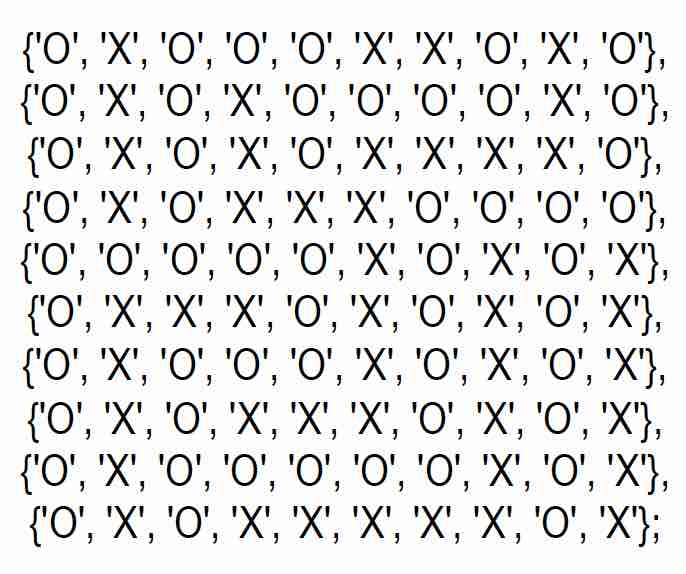

##### Solución:

In [ ]:
mapa = (('O', 'X', 'O', 'O', 'O', 'X', 'X', 'O', 'X', 'O'),
        ('O', 'X', 'O', 'X', 'O', 'O', 'O', 'O', 'X', 'O'),
        ('O', 'X', 'O', 'X', 'O', 'X', 'X', 'X', 'X', 'O'),
        ('O', 'X', 'O', 'X', 'X', 'X', 'O', 'O', 'O', 'O'),
        ('O', 'O', 'O', 'O', 'O', 'X', 'O', 'X', 'O', 'X'),
        ('O', 'X', 'X', 'X', 'O', 'X', 'O', 'X', 'O', 'X'),
        ('O', 'X', 'O', 'O', 'O', 'X', 'O', 'X', 'O', 'X'),
        ('O', 'X', 'O', 'X', 'X', 'X', 'O', 'X', 'O', 'X'),
        ('O', 'X', 'O', 'O', 'O', 'O', 'O', 'X', 'O', 'X'),
        ('O', 'X', 'O', 'X', 'X', 'X', 'X', 'X', 'O', 'X'))

class Laberinto(Problem):
    """ Problema del laberinto donde un robot iría desde una posición de entrada a una de salida """


#### EJ02.
Introduzca en la herramienta “Search” el problema que la figura siguiente representa, donde “S” es el nodo de comienzo y “G”el nodo objetivo. Recorrer el grafo utilizando el algoritmo A* teniendo en cuenta los costes indicados en cada arco y el valor heurísticodescrito en la tabla.

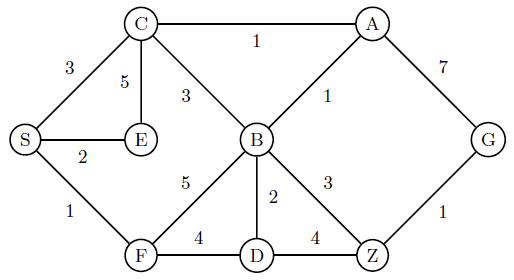

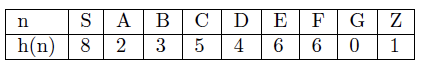

## Problemas
#### P01.
Crear el grafo correspondiente al mapa simplificado de Rumanía vista en clase de Enseñanzas básicas, no olvidando la distancia existente entre las distintas ciudades, y utilizando la distancia en línea recta desde Arad a Bucharest como valor de la heurística. A continuación, siga paso a paso el recorrido de la búsqueda “A*”. Finalmente, compárelo con los recorridos realizados por los algoritmos de búsqueda no informada.

##### Solución:

#### P02.
Incorporar una heurística en el problema de los dos cántaros de agua de la práctica anterior y realice comparativas entre los algoritmos vistos, tanto informados como ciegos.